# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
# Base url and use units as metric
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "London,UK"

# Build partial query URL
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

# Set lists to append data for DataFrame
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
existing_city = []

count = 0
set_processing = 1

# Loop through list of cities and print log
for city in cities:
    response = requests.get(query_url + city).json()
    
#     if count == 5:
#         break
    
    # adding excepting handling
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # setting the set limit
        if count > 50:
            count = 1
            set_processing += 1
            existing_city.append(city)
        else:
            count += 1
            existing_city.append(city)
        print(f"Processing Record {count} of Set {set_processing} for {city}")
    except (KeyError, IndexError):
        print("City not found, skipping...")

print("----Data Retrieval Complete----")


Processing Record 1 of Set 1 for saint george
Processing Record 2 of Set 1 for port elizabeth
Processing Record 3 of Set 1 for yellowknife
Processing Record 4 of Set 1 for port macquarie
Processing Record 5 of Set 1 for albany
Processing Record 6 of Set 1 for padang
City not found, skipping...
Processing Record 7 of Set 1 for hithadhoo
Processing Record 8 of Set 1 for busselton
Processing Record 9 of Set 1 for ushuaia
Processing Record 10 of Set 1 for thompson
Processing Record 11 of Set 1 for victoria
Processing Record 12 of Set 1 for tuktoyaktuk
Processing Record 13 of Set 1 for rudbar
Processing Record 14 of Set 1 for puerto ayora
City not found, skipping...
Processing Record 15 of Set 1 for barrow
Processing Record 16 of Set 1 for butaritari
Processing Record 17 of Set 1 for bengkulu
Processing Record 18 of Set 1 for kapaa
Processing Record 19 of Set 1 for alice springs
Processing Record 20 of Set 1 for cape town
Processing Record 21 of Set 1 for vaini
Processing Record 22 of Set 1

Processing Record 23 of Set 4 for esperance
Processing Record 24 of Set 4 for gerash
Processing Record 25 of Set 4 for kyra
Processing Record 26 of Set 4 for nakamura
Processing Record 27 of Set 4 for almaty
Processing Record 28 of Set 4 for paranaiba
Processing Record 29 of Set 4 for alofi
Processing Record 30 of Set 4 for da nang
Processing Record 31 of Set 4 for beringovskiy
Processing Record 32 of Set 4 for ixtapa
Processing Record 33 of Set 4 for ilulissat
Processing Record 34 of Set 4 for dauphin
Processing Record 35 of Set 4 for kodiak
Processing Record 36 of Set 4 for hamilton
Processing Record 37 of Set 4 for touros
Processing Record 38 of Set 4 for tynda
Processing Record 39 of Set 4 for haftoni
Processing Record 40 of Set 4 for morgan city
Processing Record 41 of Set 4 for cayenne
Processing Record 42 of Set 4 for udachnyy
Processing Record 43 of Set 4 for skjervoy
Processing Record 44 of Set 4 for saint anthony
Processing Record 45 of Set 4 for anito
City not found, skippin

Processing Record 49 of Set 7 for pamekasan
Processing Record 50 of Set 7 for mago
Processing Record 51 of Set 7 for palm coast
Processing Record 1 of Set 8 for malinovoye ozero
Processing Record 2 of Set 8 for cidreira
Processing Record 3 of Set 8 for yumen
Processing Record 4 of Set 8 for champerico
Processing Record 5 of Set 8 for knokke-heist
Processing Record 6 of Set 8 for ofaqim
Processing Record 7 of Set 8 for urucui
Processing Record 8 of Set 8 for terrace
Processing Record 9 of Set 8 for los llanos de aridane
Processing Record 10 of Set 8 for taltal
City not found, skipping...
Processing Record 11 of Set 8 for ambon
Processing Record 12 of Set 8 for neuquen
Processing Record 13 of Set 8 for bend
Processing Record 14 of Set 8 for port hawkesbury
City not found, skipping...
Processing Record 15 of Set 8 for george town
Processing Record 16 of Set 8 for ayagoz
Processing Record 17 of Set 8 for atar
Processing Record 18 of Set 8 for turukhansk
Processing Record 19 of Set 8 for vi

Processing Record 29 of Set 11 for karuzi
Processing Record 30 of Set 11 for buraydah
Processing Record 31 of Set 11 for mezhdurechensk
Processing Record 32 of Set 11 for lahij
City not found, skipping...
City not found, skipping...
Processing Record 33 of Set 11 for nizhnevartovsk
Processing Record 34 of Set 11 for anenecuilco
Processing Record 35 of Set 11 for fort nelson
Processing Record 36 of Set 11 for gorele
Processing Record 37 of Set 11 for boone
Processing Record 38 of Set 11 for riyadh
Processing Record 39 of Set 11 for tukrah
Processing Record 40 of Set 11 for revda
City not found, skipping...
Processing Record 41 of Set 11 for bilma
Processing Record 42 of Set 11 for kieta
Processing Record 43 of Set 11 for shelburne
Processing Record 44 of Set 11 for semibratovo
Processing Record 45 of Set 11 for ust-maya
----Data Retrieval Complete----


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
# Create a DataFrame from the raw data and export to csv
weather_df = pd.DataFrame({"City":existing_city,"Lat":lat,"Lng":lng,"Max temp":max_temp,"Humidity":humidity,\
                           "Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date})
weather_df["Date"] = pd.to_datetime(weather_df["Date"],unit='s').dt.strftime("%Y-%m-%d")
weather_df.to_csv("output_data/Weatherpy.csv")
weather_df.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1041,-113.5841,48.99,46,1,3.44,US,2021-02-01
1,port elizabeth,-33.9180,25.5701,66.20,77,40,16.11,ZA,2021-02-01
2,yellowknife,62.4560,-114.3525,-7.60,84,75,5.75,CA,2021-02-01
3,port macquarie,-31.4333,152.9167,84.00,52,4,4.00,AU,2021-02-01
4,albany,42.6001,-73.9662,15.01,55,100,2.26,US,2021-02-01


In [53]:
# Summary statistics on DataFrame
weather_df.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,19.731994,15.486074,50.124090,72.875676,54.205405,8.139748
std,33.008440,88.778479,32.255423,19.808124,39.997982,5.964646
min,-54.800000,-175.200000,-47.380000,13.000000,0.000000,0.250000
25%,-7.685550,-64.953250,28.990000,63.000000,7.500000,3.645000
50%,22.566700,19.961900,62.010000,78.000000,65.000000,6.910000
75%,47.320100,90.226700,75.200000,87.500000,94.000000,11.215000
max,78.218600,179.316700,105.800000,100.000000,100.000000,42.260000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [46]:
# Find cities that have greater than 100%
high_humidity = weather_df.loc[weather_df["Humidity"] > 100]
high_humidity.count()

City          0
Lat           0
Lng           0
Max temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

## No cities have greater than 100% humidity in this selection

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

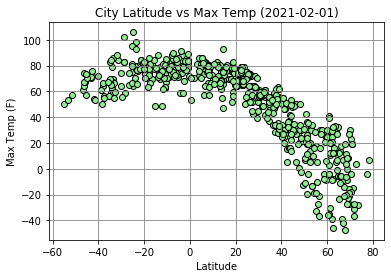

In [58]:
# Create a scattor plot of latitude vs temperature
x = weather_df["Lat"]
y = weather_df["Max temp"]
plt.scatter(x,y,edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs Max Temp (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_MaxTemp_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the Max Temp (F) for that city. At the lower latitude points of -60 there is a higher max temperature with the temperature decreasing as the Latitude reaches +80.

## Latitude vs. Humidity Plot

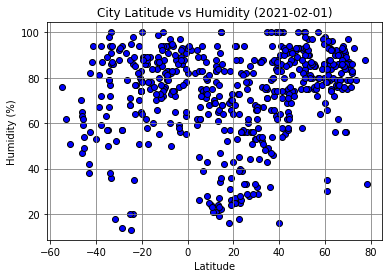

In [60]:
x = weather_df["Lat"]
y = weather_df["Humidity"]
plt.scatter(x,y,edgecolors="black",facecolors="blue")
plt.title("City Latitude vs Humidity (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_Humidity_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the Humidity % for that city. Looking at the graph there is not a strong correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

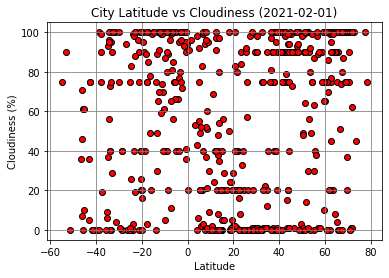

In [64]:
x = weather_df["Lat"]
y = weather_df["Cloudiness"]
plt.scatter(x,y,edgecolors="black",facecolors="red")
plt.title("City Latitude vs Cloudiness (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_Cloudiness_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the cloudiness for that city. Looking at the graph there is not a strong correlation between latitude and cloudiness, however there appear to be either a lot of no clouds or 100% cloud cover for the cities on this date.

## Latitude vs. Wind Speed Plot

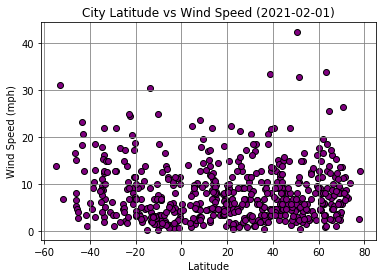

In [65]:
x = weather_df["Lat"]
y = weather_df["Wind Speed"]
plt.scatter(x,y,edgecolors="black",facecolors="purple")
plt.title("City Latitude vs Wind Speed (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_WindSpeed_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the wind speed for that city. Looking at the graph there is not a strong correlation between latitude and wind speend, however the higher latitude around 50 had a very windy day with over 40 mph wind. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


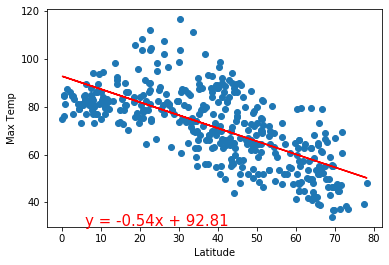

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


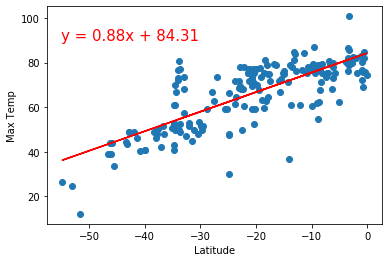

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


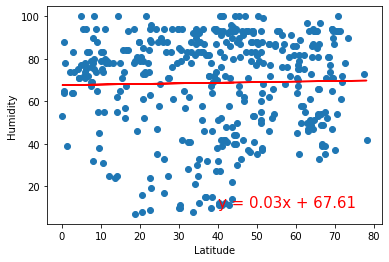

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


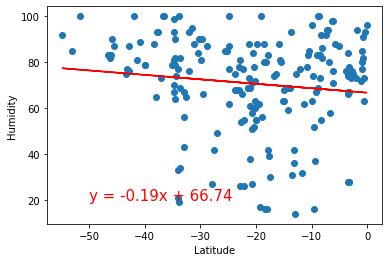

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


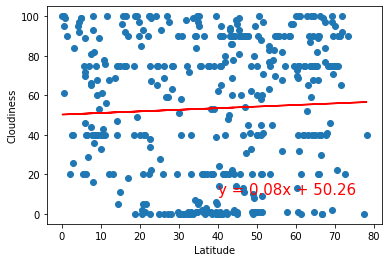

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


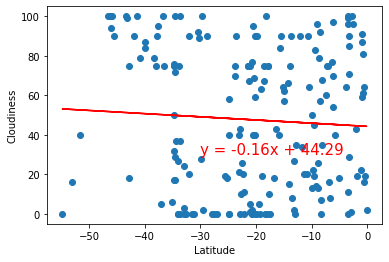

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


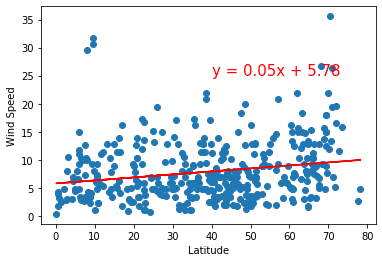

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


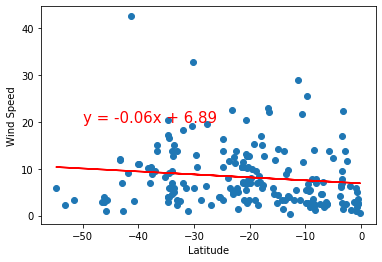